<a href="https://colab.research.google.com/github/p-rakesh/Python-scripts/blob/main/cluster_analysis_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [ ]:
# Load the customer data
customer_data = pd.read_csv('customer_data.csv')
customer_data = customer_data.drop('Gender', axis=1)
print(customer_data)
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

print(scaled_data)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0             1   19                  15                      39
1             2   21                  15                      81
2             3   20                  16                       6
3             4   23                  16                      77
4             5   31                  17                      40
..          ...  ...                 ...                     ...
195         196   35                 120                      79
196         197   45                 126                      28
197         198   32                 126                      74
198         199   32                 137                      18
199         200   30                 137                      83

[200 rows x 4 columns]
[[-1.7234121  -1.42456879 -1.73899919 -0.43480148]
 [-1.70609137 -1.28103541 -1.73899919  1.19570407]
 [-1.68877065 -1.3528021  -1.70082976 -1.71591298]
 [-1.67144992 -1.13750203 -1.70082976  1.04

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

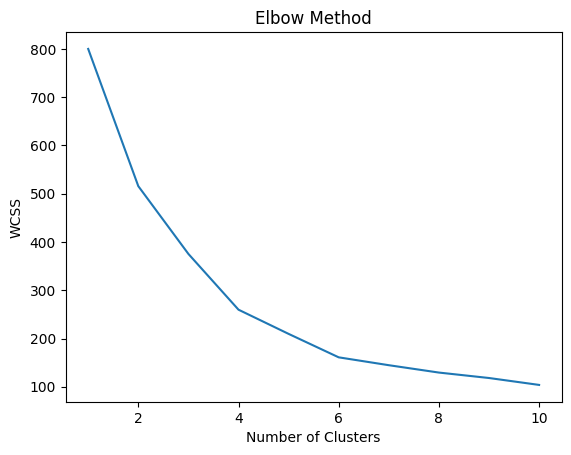

In [ ]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# casual syntax
#KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')[source]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

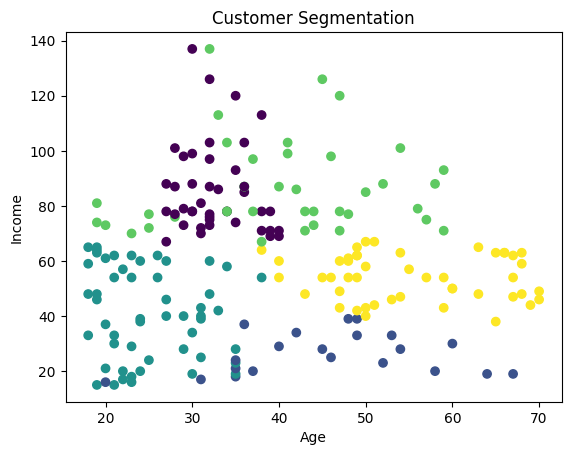

In [ ]:
# Add the cluster labels to the original DataFrame
customer_data['Cluster'] = kmeans.labels_

# Plot the clusters based on age and income
plt.scatter(customer_data['Age'], customer_data['Annual Income (k$)'], c=customer_data['Cluster'])
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()